# <center> 05MBID Minería de Datos <center>
## <center> Actividad 2 .- Procesamiento y Calidad de Datos <center>
### <center> Autor: Ricardo Marrero carrión <center>

### Indice
<ol>
<li>Objetivo</li>
<li>Librerias a utilizar</li>
<li>Dataset Origen</li>
<li>Selección de atributos</li>
<li>Limpieza de datos</li>
<li>Visualización </li>
<li>Conclusiones </li>
</ol>

### 1.- Objetivo

Crear un Dataframe (DF), para buscar patrones que muestran los Parques del Resort Walt Disney World en Orlando y así, **categorizar y etiquetar** distintos períodos en el año, que permita no solo a un turista analizar en base a una serie de atributos cuando es el mejor momento de realizar el viaje, sino que también permita a un Operador Turístico realizar campañas y ofertar promociones a sus clientes en base a estas categorías.

### 2.- Librerías a Utilizar

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

### 3.- Dataset Origen

Creamos un primer Dataset llamado "Disney" con todos los atributos del csv original

**Fuente**: "metadata.csv", Disney World Ride Wait Time Datasets, TouringPlans.com, June 2021, [enlace](https://www.touringplans.com/walt-disney-world/crowd-calendar/#DataSets), Accessed 13 June 2021.

In [2]:
disney = pd.read_csv('metadata.csv')

In [3]:
print(disney.shape)

(2120, 181)


Tenemos una muestra de 2120 filas (datos desde enero 2015) y 181 atributos

In [4]:
disney

,DATE,WDW_TICKET_SEASON,DAYOFWEEK,DAYOFYEAR,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAYPX,HOLIDAYM,...,HSFIREWKS,AKPRDDAY,AKPRDDT1,AKPRDDT2,AKPRDDN,AKFIREN,AKSHWNGT,AKSHWNT1,AKSHWNT2,AKSHWNN
0,01/01/2015,NaN,5,0,0,1,2015,CHRISTMAS PEAK,0,5,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,01/02/2015,NaN,6,1,0,1,2015,CHRISTMAS,2,5,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2,01/03/2015,NaN,7,2,0,1,2015,CHRISTMAS,3,0,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
3,01/04/2015,NaN,1,3,1,1,2015,CHRISTMAS,4,0,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
4,01/05/2015,NaN,2,4,1,1,2015,CHRISTMAS,5,0,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,05/27/2021,NaN,5,146,21,5,2021,NaN,5,0,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2116,05/30/2021,NaN,1,149,22,5,2021,NaN,2,3,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2117,05/31/2021,NaN,2,150,22,5,2021,NaN,0,0,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
2118,06/01/2021,NaN,3,151,22,6,2021,NaN,2,3,...,1,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


Observamos que es un DF que posee un gran número de columnas, **muchas de ellas con valores NaN**, que deberemos limpiar 

### 4 .- Selección de atributos

Tal y como se indicó en el Capítulo 3.1 de la Actividad 1, si bien el DF tiene 181 columnas o atributos, **no todos ellos aportan datos relevantes** para el objetivo de este estudio o predicción.
Por lo tanto, vamos a crear un 2do DF donde solo nos quedemos con los atributos que en una revisión preliminar, se ha considerado aportarán información al estudio.

In [5]:
disney2 = disney[['DATE','WDW_TICKET_SEASON','DAYOFWEEK','WEEKOFYEAR','MONTHOFYEAR','YEAR','SEASON','HOLIDAY',
                  'WDWevent','WDWrace','WDWMEANTEMP','inSession','MKEMHMORN','MKEMHEVE','MKHOURSEMH','EPEMHMORN',
                  'EPEMHEVE','EPHOURSEMH','HSEMHMORN','HSEMHEVE','HSHOURSEMH','AKEMHMORN','AKEMHEVE','AKHOURSEMH',
                  'WEATHER_WDWPRECIP','CapacityLost_MK','CapacityLost_EP','CapacityLost_HS','CapacityLost_AK',
                  'MKPRDDAY','MKFIREWK','EPFIREWK','HSFIREWK','HSSHWNGT','AKSHWNGT']]

In [6]:
print(disney2.shape)

(2120, 35)


Este nuevo conjunto de atributos, incluye el que será el **valor salida** del modelo. Como buscamos clasificar // agrupar por períodos, usaremos el atributo **'WEEKOFYEAR'**

In [7]:
disney2

,DATE,WDW_TICKET_SEASON,DAYOFWEEK,WEEKOFYEAR,MONTHOFYEAR,YEAR,SEASON,HOLIDAY,WDWevent,WDWrace,...,CapacityLost_MK,CapacityLost_EP,CapacityLost_HS,CapacityLost_AK,MKPRDDAY,MKFIREWK,EPFIREWK,HSFIREWK,HSSHWNGT,AKSHWNGT
0,01/01/2015,NaN,5,0,1,2015,CHRISTMAS PEAK,1,0,0,...,352865,325168,203780,210779,2,1,1,0,3,0
1,01/02/2015,NaN,6,0,1,2015,CHRISTMAS,0,0,0,...,352865,325168,203780,210779,2,1,1,0,3,0
2,01/03/2015,NaN,7,0,1,2015,CHRISTMAS,0,0,0,...,352865,325168,203780,210779,2,1,1,0,2,0
3,01/04/2015,NaN,1,1,1,2015,CHRISTMAS,0,0,0,...,352865,325168,203780,210779,1,1,1,0,2,0
4,01/05/2015,NaN,2,1,1,2015,CHRISTMAS,0,0,0,...,354065,325168,213779,210779,1,1,1,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2115,05/27/2021,NaN,5,21,5,2021,NaN,0,0,0,...,433057,391962,311870,231777,0,0,0,0,0,0
2116,05/30/2021,NaN,1,22,5,2021,NaN,0,0,0,...,433057,391962,311870,231777,0,0,0,0,0,0
2117,05/31/2021,NaN,2,22,5,2021,NaN,1,0,0,...,433057,391962,311870,231777,0,0,0,0,0,0
2118,06/01/2021,NaN,3,22,6,2021,NaN,0,0,0,...,433057,391962,311870,231777,0,0,0,0,0,0


Este será el DF que usaremos como punto de partida para la limpieza de los datos; lo **guardamos en un nuevo CSV**

In [8]:
disney2.to_csv('metadata2.csv',index = False)

### 5 .- Limpieza de datos

#### 5.1 .- Atributos numéricos y categóricos

In [9]:
disney2_numeric = disney2.select_dtypes(include=[np.number])
att_numericos = disney2_numeric.columns.values
print(att_numericos)
print('\n')
print(len(att_numericos),'atributos son numéricos')

['DAYOFWEEK' 'WEEKOFYEAR' 'MONTHOFYEAR' 'YEAR' 'HOLIDAY' 'WDWevent'
 'WDWrace' 'WDWMEANTEMP' 'MKEMHMORN' 'MKEMHEVE' 'MKHOURSEMH' 'EPEMHMORN'
 'EPEMHEVE' 'EPHOURSEMH' 'HSEMHMORN' 'HSEMHEVE' 'HSHOURSEMH' 'AKEMHMORN'
 'AKEMHEVE' 'AKHOURSEMH' 'WEATHER_WDWPRECIP' 'CapacityLost_MK'
 'CapacityLost_EP' 'CapacityLost_HS' 'CapacityLost_AK' 'MKPRDDAY'
 'MKFIREWK' 'EPFIREWK' 'HSFIREWK' 'HSSHWNGT' 'AKSHWNGT']


31 atributos son numéricos


In [10]:
disney2_categorico = disney2.select_dtypes(exclude=[np.number])
att_categorico = disney2_categorico.columns.values
print(att_categorico)
print('\n')
print(len(att_categorico),'atributos son categóricos')

['DATE' 'WDW_TICKET_SEASON' 'SEASON' 'inSession']


4 atributos son categóricos


#### 5.2. .- Nueva selección de atributos

Agrupando los atributos en categóricos y numéricos, vemos que el atributo 'DATE' no aporta información relevante, ya que contamos con atributos como: 'DAYOFWEEK' 'WEEKOFYEAR' 'MONTHOFYEAR' 'YEAR'; así que lo eliminamos del DF

In [11]:
disney3 = disney2.drop(['DATE'],axis = 1)

In [12]:
print(disney3.shape)

(2120, 34)


Por otro lado, el atributo 'inSession' lo transformamos en un valor numérico, para obtener su semántica real; un valor porcentual.

In [13]:
disney3['inSession'] = disney3['inSession'].str.rstrip('%').astype('float')

In [14]:
disney3.inSession

0        0.0
1        0.0
2        0.0
3       67.0
4       67.0
        ... 
2115     NaN
2116     NaN
2117     NaN
2118     NaN
2119     NaN
Name: inSession, Length: 2120, dtype: float64

Revisamos nuevamente como quedan categorizados los atributos

In [15]:
disney3_numeric = disney3.select_dtypes(include=[np.number])
att_numericos = disney3_numeric.columns.values
print(att_numericos)
print('\n')
print(len(att_numericos),'atributos son numéricos')

['DAYOFWEEK' 'WEEKOFYEAR' 'MONTHOFYEAR' 'YEAR' 'HOLIDAY' 'WDWevent'
 'WDWrace' 'WDWMEANTEMP' 'inSession' 'MKEMHMORN' 'MKEMHEVE' 'MKHOURSEMH'
 'EPEMHMORN' 'EPEMHEVE' 'EPHOURSEMH' 'HSEMHMORN' 'HSEMHEVE' 'HSHOURSEMH'
 'AKEMHMORN' 'AKEMHEVE' 'AKHOURSEMH' 'WEATHER_WDWPRECIP' 'CapacityLost_MK'
 'CapacityLost_EP' 'CapacityLost_HS' 'CapacityLost_AK' 'MKPRDDAY'
 'MKFIREWK' 'EPFIREWK' 'HSFIREWK' 'HSSHWNGT' 'AKSHWNGT']


32 atributos son numéricos


In [16]:
disney3_categorico = disney3.select_dtypes(exclude=[np.number])
att_categorico = disney3_categorico.columns.values
print(att_categorico)
print('\n')
print(len(att_categorico),'atributos son categóricos')

['WDW_TICKET_SEASON' 'SEASON']


2 atributos son categóricos


#### 5.3 .- Revisión de Missing Values

Con los 34 atributos que hemos escogido para el modelo, procedemos a revisar la consistencia de los datos en cada instancia

<AxesSubplot:>

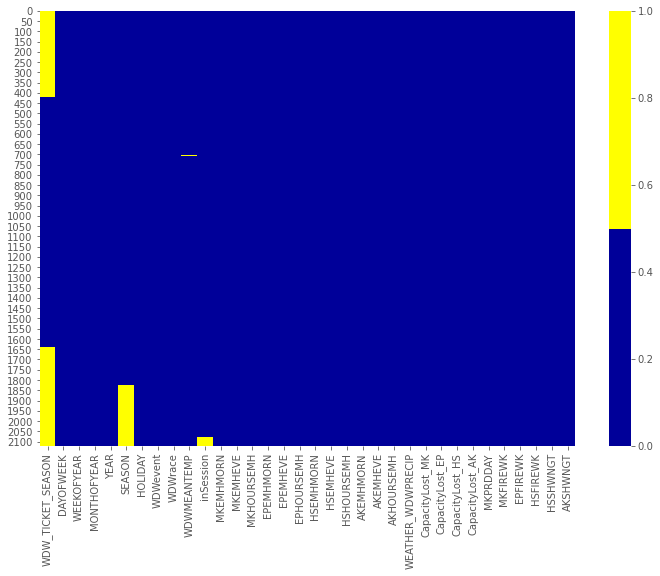

In [17]:
cols = disney3.columns
colours = ['#000099', '#ffff00']
sns.heatmap(disney3[cols].isnull(), cmap=sns.color_palette(colours))

In [18]:
for col in disney3.columns:
    pct_missing = np.mean(disney3[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

WDW_TICKET_SEASON - 43%
DAYOFWEEK - 0%
WEEKOFYEAR - 0%
MONTHOFYEAR - 0%
YEAR - 0%
SEASON - 14%
HOLIDAY - 0%
WDWevent - 0%
WDWrace - 0%
WDWMEANTEMP - 0%
inSession - 2%
MKEMHMORN - 0%
MKEMHEVE - 0%
MKHOURSEMH - 0%
EPEMHMORN - 0%
EPEMHEVE - 0%
EPHOURSEMH - 0%
HSEMHMORN - 0%
HSEMHEVE - 0%
HSHOURSEMH - 0%
AKEMHMORN - 0%
AKEMHEVE - 0%
AKHOURSEMH - 0%
WEATHER_WDWPRECIP - 0%
CapacityLost_MK - 0%
CapacityLost_EP - 0%
CapacityLost_HS - 0%
CapacityLost_AK - 0%
MKPRDDAY - 0%
MKFIREWK - 0%
EPFIREWK - 0%
HSFIREWK - 0%
HSSHWNGT - 0%
AKSHWNGT - 0%


Del anterior mapa de calor y % de missing values, podemos obtener varias conclusiones:
- De los 181 atributos originales, y que presentaban gran número de valores NaN; los 34 escogidos para el modelo ofrecen datos consistentes (casi todos con 0% de missing values)
- El atributo 'WDW_TICKET_SEASON'. posee una gran cantidad de NaN (43%), y es un dato muy importante para el estudio, porque contiene la información de la categoría de precios (Peak, Regular, Value). Por lo tanto, no podemos prescindir del mismo y debemos reemplazar estos valores perdidos
- El atributo 'inSession' presenta solo un 2% de missing values (42 instancias), por lo que sustituiremos esos NaN por la mediana de la muestra.
- ¿Existe relación entre precio de los tickets ('WDW_TICKET_SEASON') y la temporada del año ('SEASON')?; si fuese así, pudiesemos prescindir de esta última ,que presenta 14% de missing values

##### 5.3.1. Quitar NaN en atributo 'InSession'

Primero vamos a revisar si existen Outliers, para determinar si sustituimos los NaN, por la media o por la mediana

<AxesSubplot:>

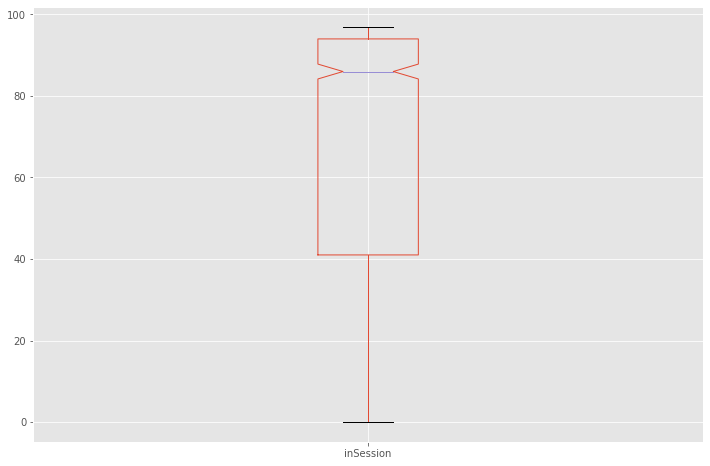

In [19]:
disney3.boxplot(column=['inSession'],notch = True)

In [20]:
disney3.inSession.median()

86.0

In [21]:
disney3.inSession.mean()

67.39009139009138

No hay datos Outliers, y para no alterar el comportamiento del atributo, usaremos la mediana para los valores NaN

In [22]:
mediana = disney3['inSession'].median()
disney3['inSession'] = disney3['inSession'].fillna(mediana)

In [23]:
disney3.inSession.median()

86.0

In [24]:
disney3.inSession.mean()

67.75

In [25]:
perdido = np.mean(disney3['inSession'].isnull())
print('{} - {}%'.format('inSession', round(perdido*100)))

inSession - 0%


Completando los Nan, con la mediana, no alteramos los estadísticos del atributos; se comprueba que no quedan valores NaN.

##### 5.3.2 .- Quitar NaN en atributo 'WDW_TICKET_SEASON'

En un primer análisis, se ha intentado relacionar esta columna, con alguna otra del DF, que permitiese asociar alguno de los tres valores de esta categoría; al no encontrar nada en concreto, hemos usado el calendario oficial del 2021, para relacionar las semanas con valores NaN en este atributo

[Calendario WDW 2021](http://www.disneyticketcalendar.com/wdw.pdf)

**Aunque no es el método mas eficiente**, no se ha encontrado una función que haga esta sustitución, por medio de un bucle, debido a la asignación del calendario anterior. Por lo tanto, se opta por sustituirlos directamente el el fichero .csv y cargar un nuevo DataFrame ('**metadata4.csv**')

Durante este paso manual, se elimina una fila que se observó tenía valores incorrectos

In [26]:
disney3.to_csv('metadata3.csv',index = False)

In [27]:
disney4 = pd.read_csv('metadata4.csv', sep = ';')

Comprobamos el nuevo DF

In [28]:
print(disney4.shape)

(2119, 34)


In [29]:
disney4_numeric = disney4.select_dtypes(include=[np.number])
att_numericos = disney4_numeric.columns.values
print(att_numericos)
print('\n')
print(len(att_numericos),'atributos son numéricos')

['DAYOFWEEK' 'WEEKOFYEAR' 'MONTHOFYEAR' 'YEAR' 'HOLIDAY' 'WDWevent'
 'WDWrace' 'WDWMEANTEMP' 'inSession' 'MKEMHMORN' 'MKEMHEVE' 'MKHOURSEMH'
 'EPEMHMORN' 'EPEMHEVE' 'EPHOURSEMH' 'HSEMHMORN' 'HSEMHEVE' 'HSHOURSEMH'
 'AKEMHMORN' 'AKEMHEVE' 'AKHOURSEMH' 'WEATHER_WDWPRECIP' 'CapacityLost_MK'
 'CapacityLost_EP' 'CapacityLost_HS' 'CapacityLost_AK' 'MKPRDDAY'
 'MKFIREWK' 'EPFIREWK' 'HSFIREWK' 'HSSHWNGT' 'AKSHWNGT']


32 atributos son numéricos


In [30]:
disney4_categorico = disney4.select_dtypes(exclude=[np.number])
att_categorico = disney4_categorico.columns.values
print(att_categorico)
print('\n')
print(len(att_categorico),'atributos son categóricos')

['WDW_TICKET_SEASON' 'SEASON']


2 atributos son categóricos


In [31]:
for col in disney4.columns:
    pct_missing = np.mean(disney4[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

WDW_TICKET_SEASON - 0%
DAYOFWEEK - 0%
WEEKOFYEAR - 0%
MONTHOFYEAR - 0%
YEAR - 0%
SEASON - 14%
HOLIDAY - 0%
WDWevent - 0%
WDWrace - 0%
WDWMEANTEMP - 0%
inSession - 0%
MKEMHMORN - 0%
MKEMHEVE - 0%
MKHOURSEMH - 0%
EPEMHMORN - 0%
EPEMHEVE - 0%
EPHOURSEMH - 0%
HSEMHMORN - 0%
HSEMHEVE - 0%
HSHOURSEMH - 0%
AKEMHMORN - 0%
AKEMHEVE - 0%
AKHOURSEMH - 0%
WEATHER_WDWPRECIP - 0%
CapacityLost_MK - 0%
CapacityLost_EP - 0%
CapacityLost_HS - 0%
CapacityLost_AK - 0%
MKPRDDAY - 0%
MKFIREWK - 0%
EPFIREWK - 0%
HSFIREWK - 0%
HSSHWNGT - 0%
AKSHWNGT - 0%


<AxesSubplot:>

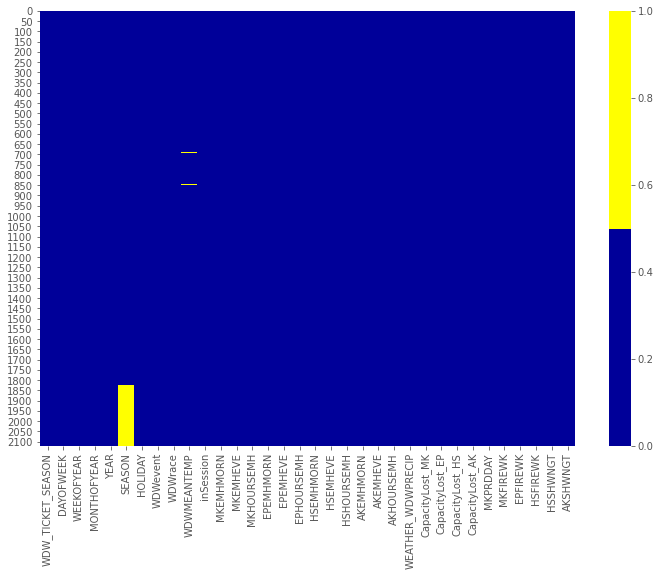

In [32]:
cols = disney4.columns
colours = ['#000099', '#ffff00']
sns.heatmap(disney4[cols].isnull(), cmap=sns.color_palette(colours))

A pesar que el atributo 'WDWMEANTEMP' presenta valores NaN muy bajos, usamos la misma técnica de asignar la mediana para completar los mismos.

In [33]:
mediana2 = disney4['WDWMEANTEMP'].median()
disney4['WDWMEANTEMP'] = disney4['WDWMEANTEMP'].fillna(mediana2)

<AxesSubplot:>

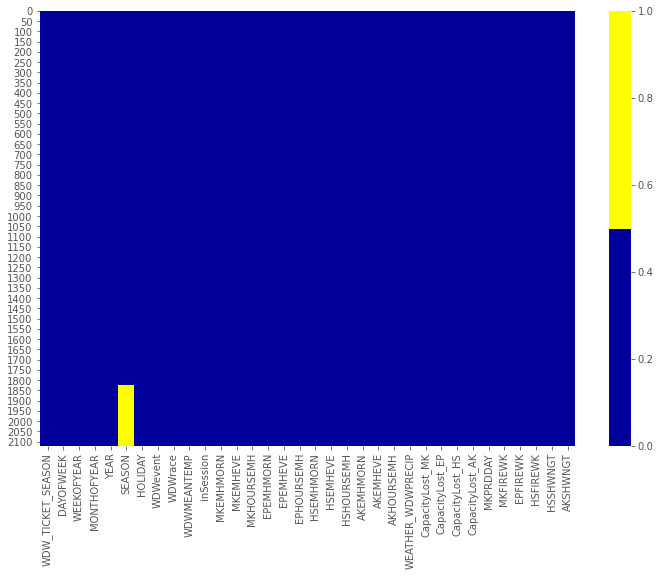

In [34]:
cols = disney4.columns
colours = ['#000099', '#ffff00']
sns.heatmap(disney4[cols].isnull(), cmap=sns.color_palette(colours))

##### 5.3.3 .- Atributo 'SEASON'

Nos queda entonces el tratamiento de los Missing Values del atributo 'SEASON', en este caso, ejecutaremos una doble revisión:
- Por un lado estandarizamos las temporadas del año, en las cuatros estaciones, para hacerlo mas universal. Ya que el DF orginal, viene con muchas fechas específicas de USA
- Con el recorrido de ls semanas ('WEEKOFYEAR'), limpiamos los Nan

In [35]:
for i in range(0,len(disney4)):
    if (0 <= disney4.loc[i,'WEEKOFYEAR'] <= 7):
        disney4.loc[i,'SEASON'] = 'INVIERNO'
    elif (8 <= disney4.loc[i,'WEEKOFYEAR'] <= 26):
        disney4.loc[i,'SEASON'] = 'PRIMAVERA'
    elif (27 <= disney4.loc[i,'WEEKOFYEAR'] <= 32):
        disney4.loc[i,'SEASON'] = 'VERANO'
    elif (33 <= disney4.loc[i,'WEEKOFYEAR'] <= 48):
        disney4.loc[i,'SEASON'] = 'OTONYO'
    elif (49 <= disney4.loc[i,'WEEKOFYEAR'] <= 53):
        disney4.loc[i,'SEASON'] = 'INVIERNO'
        

Y por último comprobamos que ya no queden valores NaN en el Data Frame

In [36]:
for col in disney4.columns:
    pct_missing = np.mean(disney4[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

WDW_TICKET_SEASON - 0%
DAYOFWEEK - 0%
WEEKOFYEAR - 0%
MONTHOFYEAR - 0%
YEAR - 0%
SEASON - 0%
HOLIDAY - 0%
WDWevent - 0%
WDWrace - 0%
WDWMEANTEMP - 0%
inSession - 0%
MKEMHMORN - 0%
MKEMHEVE - 0%
MKHOURSEMH - 0%
EPEMHMORN - 0%
EPEMHEVE - 0%
EPHOURSEMH - 0%
HSEMHMORN - 0%
HSEMHEVE - 0%
HSHOURSEMH - 0%
AKEMHMORN - 0%
AKEMHEVE - 0%
AKHOURSEMH - 0%
WEATHER_WDWPRECIP - 0%
CapacityLost_MK - 0%
CapacityLost_EP - 0%
CapacityLost_HS - 0%
CapacityLost_AK - 0%
MKPRDDAY - 0%
MKFIREWK - 0%
EPFIREWK - 0%
HSFIREWK - 0%
HSSHWNGT - 0%
AKSHWNGT - 0%


Exportarmos la versión sin Null del DataFrame

In [37]:
disney4.to_csv('metadata5.csv',index = False)

#### 5.4. Normalización de la información

En este apartado ejecutaremos varias tareas para normalizar datos de varios atributos y estandarizar formatos.
- El atributo (**'WDWMEANTEMP'**), se encuentra en ºF; por lo tanto hay que normalizar estos valores a ºC para usar el formato europeo.
- El atributo (**'inSession'**) refleja el valor porcentual de visitas escolares; este dato es significativo, porque se traduce en un aumento considerable de los visitantes. Por lo tanto haremos una normalización entre 0 y 1, donde 0 = no hay colegios en los parques y 1 = alta afluencia de colegios en los parques
- Los atributos (**'CapacityLost_x'**) marcan la capacidad perdida por hora en los parques, por fallo en las atracciones. Por lo tanto es un dato significativo, que nos puede decir, en que período de año, hay mas fallos y por lo tanto no es atractivo realizar la visita a los parques. Normalizaremos igualmente este atributo entre 0 y 1, donde 0 = minima ausencia de fallos y 1 = máxima presencia de fallos.
- Adicionalmente con el atributo anterior, se buscará unificar el valor de las 4 columnas (una por cada parque del resort), en la media aritmética; ya que para el objeto de este estudio, aporta mas el valor agrupado.
- La cantidad de horas que abren los parques es también un valor interesante para valorar en el modelo; para normalizar este valor, ya que cada uno tiene un horario distinto; agruparemos las horas totales de apertura, e igualmente normalizaremos vs el día con mayor número de horas

In [38]:
session_max = disney4.inSession.max()
for i in range(0,len(disney4)):
    x = disney4.loc[i,'WDWMEANTEMP']
    disney4.loc[i,'WDWMEANTEMP'] = round((x - 32) * 5/9,2) # cambio a ºC
    disney4.loc[i,'inSession'] = round((disney4.loc[i,'inSession'])/session_max,2) # normalizar inSession

In [39]:
#### Normalización del atributo de Capacidad
disney4['TotalCapacityLost'] = (disney4.CapacityLost_AK + disney4.CapacityLost_EP + disney4.CapacityLost_HS +
disney4.CapacityLost_MK)/4
capacity_max = disney4.TotalCapacityLost.max()
for i in range(0,len(disney4)):
    disney4.loc[i,'TotalCapacityLost'] = round((disney4.loc[i,'TotalCapacityLost'])/capacity_max,2)
### Borramos las columnas de Capacity_Lost, que ya no son necesarias en el DF

In [40]:
### Normalización del atributo de horas de apertura
disney4['TotalHoras'] = (disney4.MKHOURSEMH + disney4.EPHOURSEMH + disney4.HSHOURSEMH + disney4.AKHOURSEMH)/4
apertura_max = disney4.TotalHoras.max()
for i in range(0,len(disney4)):
    disney4.loc[i,'TotalHoras'] = round((disney4.loc[i,'TotalHoras'])/apertura_max,2)

Borramos columnas no necesarias, como ya hemos normalizado en un atributo de total de horas de apertura, eliminamos también las correspondientes a "horas extras" del parque, ya que sería un dato redundante

In [41]:
disney5 = disney4.drop(['CapacityLost_AK','CapacityLost_EP','CapacityLost_HS','CapacityLost_MK','MKHOURSEMH',
                        'EPHOURSEMH','HSHOURSEMH','AKHOURSEMH','MKEMHMORN','MKEMHEVE','EPEMHMORN',
                        'EPEMHEVE','HSEMHMORN','HSEMHEVE','AKEMHMORN','AKEMHEVE'],axis = 1)

In [42]:
disney5.shape

(2119, 20)

#### 5.5. Agrupación de atributos

El DF tiene una serie de atributos, que representan, espectáculos adicionales en el parque, que puede aportar información al modelo, ya que para el visitante, son actividades extras que se puede realizar. Mientras más opciones hay, se puede disribuir mejor el tiempo entre atracciones y espectáculos.

Agruparemos estos atributos, para tener un solo datos de desición en este campo.

In [43]:
disney5['extraEvents'] = disney5.MKPRDDAY + disney5.MKFIREWK + disney5.EPFIREWK + disney5.HSFIREWK + disney5.HSSHWNGT + disney5.AKSHWNGT

In [44]:
disney6 = disney5.drop(['MKPRDDAY','MKFIREWK','EPFIREWK','HSFIREWK','HSSHWNGT','AKSHWNGT'],axis = 1)

In [45]:
disney6.shape

(2119, 15)

#### 5.6. Revisar datos repetitivos

Por último, valoramos si hay algún atributo que no tenga significancia o peso en la desición

In [46]:
filas = len(disney6.index)
info = [] #

for col in disney6.columns:
    contar = disney6[col].value_counts(dropna=False)
    top_pct = (contar/filas).iloc[0]
    
    if top_pct > 0.95:
        info.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(contar)
        print()

WDWrace: 95.89429%
0    2032
1      87
Name: WDWrace, dtype: int64



Eliminamos este atributo, porque del total de la muestra solo menos del 5% este evento puede tener un efecto en la desición

In [47]:
disney7 = disney6.drop(['WDWrace'],axis=1)

In [48]:
disney7.shape

(2119, 14)

#### 5.7 .- Renombar nombres de las columnas

Una vez finalizado el proceso de limpieza, y preprocesamiento de los datos, es necesario asignar al DF nombres en las columnas que sean faciles de entender en su visualización final.

In [49]:
disney7.columns = ['NIVEL_TEMPORADA','DIA_SEMANA','SEMANA_ANYO','MES_ANYO','ANYO','ESTACION','FESTIVO',
                   'EVENTO_EXTRA','TEMPERATURA_MEDIA','RATIO_OCUPACION_ESCOLAR','PRECIPITACIONES_MEDIA',
                  'RATIO_CAPACIDAD_FALLOS','RATIO_HORAS_APERTURA','TOTAL_EXTRAS']

In [50]:
disney7.to_csv('metadata6.csv',index = False) # guardamos fichero tratado

### 6 .- Visualización

***Diccionario del DataFrame Final ***

| COLUMNA | TIPO | DESCRIPCION | FACTOR DE DECISION |
| ----- | --- | ----- | ------ | 
| NIVEL_TEMPORADA | String | Categoría del precio de las entradas | Precio |
| DIA_SEMANA | Entero | Dia de la semana en numeros (1...7) | Fecha |
| SEMANA_ANYO | Entero | Número de la semana (0...53) | Fecha |
| MES_ANYO | Entero | Número del mes del año (1...12) | Fecha |
| ANYO | Entero | Año | Fecha |
| ESTACION | String | Época del año | Ocupación o Afluencia |
| FESTIVO | Booleano | Es / No es un día festivo | Ocupación o Afluencia |
| EVENTO_EXTRA | Booleano | Hay / No hay eventos externos al parque | Ocupacion o Afluencia |
| TEMPERATURA_MEDIA | Entero | Media de la temperatura en ºC | Factores Medioambientales |
| RATIO_OCUPACION_ESCOLAR | Float | Grado de ocupación de los parques por colegios (0...1) | Ocupación o Afluencia |
| PRECIPITACIONES_MEDIA | Float | Media de lluvia | Factores Medioambientales |
| RATIO_CAPACIDAD_FALLOS | Float | Grado de pérdida de capacidad del parque por fallos en las atracciones (0...1) | Ocupación a Aluencia |
| RATIO_HORAS_APERTURA | Float | Razón de total horario de apertura de los parques (0...1) | Horario de Apertura |
| TOTAL_EXTRAS | Entero | Cantidad de actividades extras en los parques | Actividades Extras |

In [51]:
disney7

,NIVEL_TEMPORADA,DIA_SEMANA,SEMANA_ANYO,MES_ANYO,ANYO,ESTACION,FESTIVO,EVENTO_EXTRA,TEMPERATURA_MEDIA,RATIO_OCUPACION_ESCOLAR,PRECIPITACIONES_MEDIA,RATIO_CAPACIDAD_FALLOS,RATIO_HORAS_APERTURA,TOTAL_EXTRAS
0,MEDIA,5,0,1,2015,INVIERNO,1,0,19.12,0.00,0.12,0.76,0.80,7
1,BAJA,6,0,1,2015,INVIERNO,0,0,20.76,0.00,0.12,0.76,0.83,7
2,BAJA,7,0,1,2015,INVIERNO,0,0,24.01,0.00,0.07,0.76,0.76,6
3,ALTA,1,1,1,2015,INVIERNO,0,0,24.42,0.69,0.12,0.76,0.71,5
4,ALTA,2,1,1,2015,INVIERNO,0,0,18.11,0.69,0.12,0.77,0.67,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2114,MEDIA,5,21,5,2021,PRIMAVERA,0,0,27.43,0.89,0.16,0.95,0.66,0
2115,MEDIA,1,22,5,2021,PRIMAVERA,0,0,27.36,0.89,0.19,0.95,0.66,0
2116,MEDIA,2,22,5,2021,PRIMAVERA,1,0,23.94,0.89,0.20,0.95,0.66,0
2117,BAJA,3,22,6,2021,PRIMAVERA,0,0,26.80,0.89,0.20,0.95,0.66,0


### 7 .- Conclusiones

La etapa de procesamiento nos ha permitido, mediante una serie de técnicas e intrucciones en Python, depurar el DF necesario para ejecutar el modelo predictivo propuesto en la Actividad 1.

Durante todo este proceso hemos podido analizar el DF, descartando atributos y valores que no aportaban datos significativos para ejecutar el modelo.

Como resultado, de un DF original de 181 atributos, muchos de ellos con valores NaN, hemos llegado a un DF con tan solo 14 columnas que muestran valores consistentes en los distintos campos de desición:
- Precio de las entradas
- Fecha o época del año
- Ocupación y afluencia de los parques
- Horario de apertura
- Actividades Extras

La gran parte de los atributos son variables cuantitatitas, que permitirá al modelo escogido del proceso KDD basarse en valores numéricos para su ejecución.

Como punto de mejora de esta actividad, que por tiempo, y herramientas no se ha podido realizar, es buscar la forma de completar de una forma automatizada (modelado de datos perdidos) los valores NaN del atributo 'NIVEL_TEMPORADA'; ya que al depender de la semanas y dias del año, no siguen un patrón constante.  En la presente actividad se hizo de forma manual, y sobre un fichero .csv